<a href="https://colab.research.google.com/github/andturken/COVID19-Global-Prediction/blob/master/covid_global_test_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/COVID19-Global-Prediction
!ls


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/COVID19-Global-Prediction
 covid19countryinfo.csv			    mobility_report.csv
 covid-19-tests-country-mar20-humdata.csv   owid-covid-data.csv
 covid_global_05_13_20.ipynb		    owid-covid-data-OurWorldInData.xlsx
 covid-mobility-report-data-extractor	    OxCGRT_latest.txt
 covid_spread.csv			    OxCGRT_timeseries_all.xlsx
 csse_covid_19_daily_reports		    README.md
 csse_covid_19_time_series		    UID_ISO_FIPS_LookUp_Table.csv
'fetch latest

In [2]:
#%config IPCompleter.greedy=True
# %matplotlib inline

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
import os, sys, warnings, io, requests, time, datetime

warnings.simplefilter('ignore')

sys.path.append(os.getcwd())

print(os.getcwd())
#! git clone 
#! wget 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/content/drive/My Drive/COVID19-Global-Prediction


In [3]:
covid_kaggle = pd.read_csv('kaggle/train.csv')
covid_kaggle.head()
covid_kaggle.sample(5)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
379047,486804,Tishomingo,Mississippi,US,19383,1.012945,2020-04-13,Fatalities,0.0
701186,900579,Richmond,Virginia,US,9023,0.109798,2020-03-12,ConfirmedCases,0.0
51124,65633,NaN,NaN,Tajikistan,9101000,0.062407,2020-03-19,ConfirmedCases,0.0
555018,712809,Crawford,Pennsylvania,US,84629,0.088136,2020-05-06,ConfirmedCases,1.0
724922,931073,Putnam,West Virginia,US,56450,0.091398,2020-02-28,ConfirmedCases,0.0


In [0]:
df = covid_kaggle.copy()
df['Date'] =  pd.to_datetime(df.Date)
# df[df.Date < datetime(2020, 4, 20)]

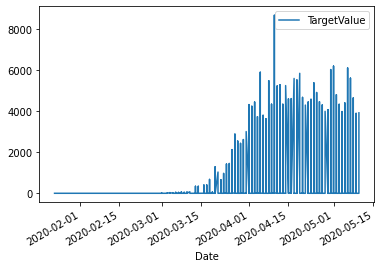

In [21]:
df[df['Country_Region']=='United Kingdom'][df['Target']=='ConfirmedCases'][['Date','TargetValue']].plot(x='Date',y='TargetValue')

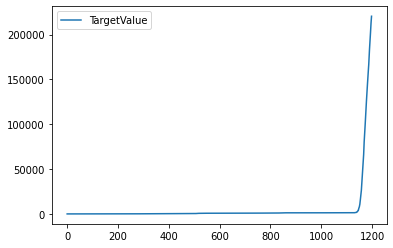

In [32]:
df[df['Country_Region']=='United Kingdom'][df['Target']=='ConfirmedCases'][['TargetValue']].cumsum(0).reset_index(drop=True).plot()

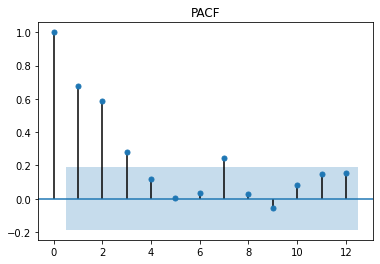

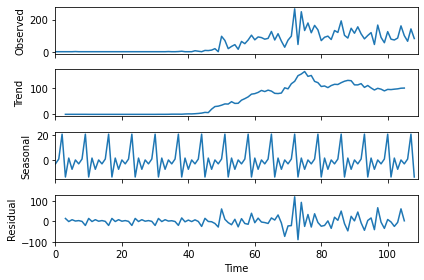

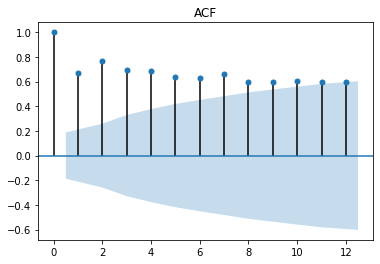

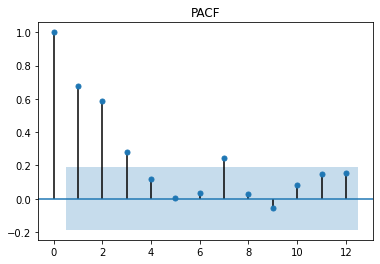

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

country = 'Finland'
#ts = df[df['Country_Region']==country][df['Target']=='ConfirmedCases'][['TargetValue']].cumsum(0).reset_index(drop=True)
#fig=sm.tsa.seasonal_decompose(ts.values,freq=7).plot()
ts = df[df['Country_Region']==country][df['Target']=='ConfirmedCases'][['TargetValue']].reset_index(drop=True)
fig2=sm.tsa.seasonal_decompose(ts.values,freq=7).plot()

#test_stat = adfuller(ts.value, autolag='AIC')

plot_acf(ts,lags=12,title="ACF")
plot_pacf(ts,lags=12,title="PACF")

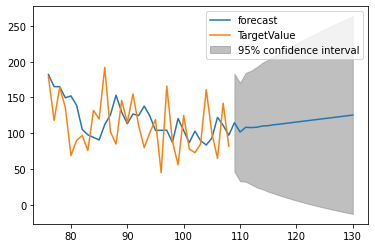

In [63]:
  model = ARIMA(ts, order=(4,1,0))
  result = model.fit()
  result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
  pred=result.forecast(steps=10)[0]
  #Plotting results
  # f,ax=plt.subplots()
  # plt.plot(ts,c='green', label= 'ts')
  # plt.plot(pred,c='red', label= 'predictions')
  # #plt.plot(test, c='red',label='real values')
  # plt.legend()
  # plt.title('arima predictions')
  # #Printing the error metrics
  # print(result.summary()) 

In [5]:
country_reg = set(df['Country_Region'])
country_reg

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',